# Apode Tutorial

This tutorial shows the current functionalities of the Apode package. Apode contains various methods to calculate measures and generate graphs on the following topics:

* Poverty
* Inequality
* Welfare
* Polarization
* Concentration


## Getting Started

### ApodeData class

The objects are created as:

    df = ApodeData(DataFrame,income_column)
    
Where income_column is the name of the column of interest for the analysis in the dataframe.

Methods that calculate indicators:
   
    df.poverty(method,*args)    
    df.ineq(method,*args)
    df.welfare(method,*args) 
    df.polar(method,*args)
    df.conc(method,*args)
 
Métodos that generate graphs:

    df.tip(*args,**kwargs)
    df.lorenz(*args,**kwargs)
    df.pen(*args,**kwargs)
    
    

### Data Creation and Description

* Data can be generated manually or by means of a simulation. They are contained in a DataFrame object.
* Other categoric variables that allow for the indicators to be applied by groups (groupby) might be available.

In [2]:
import numpy as np
import pandas as pd

from apode import ApodeData
from apode import datasets 

### Manual data loading

An object can be generated from a DataFrame or from a valid argument in the DataFrame method. The function *binning* can be used to group the data by number of bins.


In [3]:
x = [23, 10, 12, 21, 4, 8, 19, 15, 11, 9]
df1 = pd.DataFrame({'x':x})
ad1 = ApodeData(df1, income_column="x") 
ad1

,x
0,23
1,10
2,12
3,21
4,4
5,8
6,19
7,15
8,11
9,9


### Data simulation

The module *datasets* contains some distribution examples commonly used to model the income distribution.

In [5]:
# Generate data
# list1 = ['uniform','lognormal','exponential','pareto','chisquare','gamma','weibull']
# list2 = ['constant',linear','squared','extreme','unimodal','bimodal']

n = 1000 # observations
seed = 12345
ad2 = datasets.make_weibull(seed=seed,size=n)
ad2.describe()

,x
count,1000.000000
mean,45.408376
std,30.207372
min,0.112876
25%,22.363891
50%,39.404779
75%,62.690946
max,190.596705


In [7]:
# Plotting the distribution

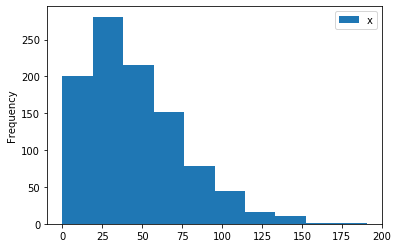

In [6]:
ad2.plot();

## Poverty 

Different poverty measures are implemented, as well as the TIP curve, which allows for a graphic comparison of poverty amongst different distributions.

All the methods require the poverty line (*pline*) as argument. Some methods require an additional parameter, *alpha*. In some cases, a default value is set for it.

### Numerical measures

In [7]:
# Absolute poverty
pline = 50 # Poverty line
p = ad2.poverty('headcount',pline=pline)
p

0.626

In [8]:
# Relative poverty
# pline = factor*stat  [stat: mean, median, quantile_q]
p1 = ad2.poverty('headcount')  # pline= 0.5*median(y)
p2 = ad2.poverty('headcount', pline='median', factor=0.5)
p3 = ad2.poverty('headcount', pline='quantile', q=0.5, factor=0.5)
p4 = ad2.poverty('headcount', pline='mean', factor=0.5)
p1, p2, p3, p4

(0.214, 0.214, 0.214, 0.256)

In [9]:
# Evaluating a list of poverty methods
pov_list = [["headcount", None],
         ["gap", None],
         ["severity",None],
         ["fgt",1.5],
         ["sen",None],
         ["sst",None],
         ["watts",None],
         ["cuh",0],
         ["cuh",0.5],
         ["takayama",None],
         ["kakwani",None],
         ["thon",None],
         ["bd",1.0],
         ["bd",2.0],
         ["hagenaars",None],
         ["chakravarty",0.5]]
p = []
for elem in pov_list:
    if elem[1]==None:
        p.append(ad2.poverty(elem[0],pline=pline))
    else:
        p.append(ad2.poverty(elem[0],pline=pline,alpha=elem[1]))
        df_p = pd.concat([pd.DataFrame(pov_list),pd.DataFrame(p)],axis=1)
df_p.columns = ['method','alpha','measure']
df_p   

,method,alpha,measure
0,headcount,NaN,0.626000
1,gap,NaN,0.295057
2,severity,NaN,0.182768
3,fgt,1.5,0.227611
4,sen,NaN,0.415923
5,sst,NaN,0.252163
6,watts,NaN,0.525879
7,cuh,0.0,0.413033
8,cuh,0.5,0.342701
9,takayama,NaN,-0.305240


### Graph measures

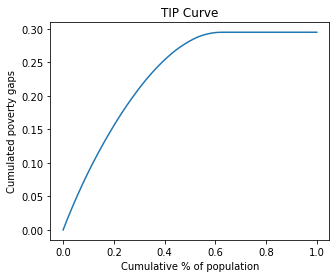

In [10]:
# TIP curve
ad2.plot("tip",pline=pline);

## Inequality 

Twelve inequality measures as well as the relative, generalized and absolute Lorenz Curves are implemented. The Lorenz Curves allow to graphically compare the inequality amongst distributions.

### Numerical measures

In [11]:
# Evaluate an inequality method
q = ad2.inequality('gini')
q

0.3652184907296814

In [12]:
# Evaluate a list of inequality methods
ineq_list = [["rrange", None],
         ["rad", None],
         ["cv",None],
         ["sdlog",None],
         ["gini",None],
         ["merhan",None],
         ["piesch",None],
         ["bonferroni",None],
         ["kolm",0.5],
         ["ratio",0.05],
         ["ratio",0.2],
         ["entropy",0],
         ["entropy",1],
         ["entropy",2],         
         ["atkinson",0.5],
         ["atkinson",1.0],
         ["atkinson",2.0]]
p = []
for elem in ineq_list:
    if elem[1]==None:
        p.append(ad2.inequality(elem[0]))
    else:
        p.append(ad2.inequality(elem[0],alpha=elem[1]))

df_i = pd.concat([pd.DataFrame(ineq_list),pd.DataFrame(p)],axis=1)
df_i.columns = ['method','alpha','measure']
df_i   

,method,alpha,measure
0,rrange,NaN,4.194905
1,rad,NaN,0.264575
2,cv,NaN,0.664905
3,sdlog,NaN,0.916263
4,gini,NaN,0.365218
5,merhan,NaN,0.512500
6,piesch,NaN,0.288587
7,bonferroni,NaN,0.510418
8,kolm,0.50,36.566749
9,ratio,0.05,0.032061


### Graph measures

An argument is *plot* (True by default).

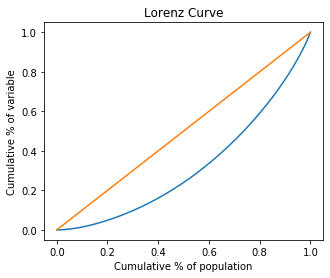

In [13]:
# Lorenz Curves
ad2.plot.lorenz();

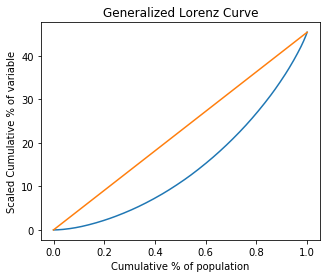

In [14]:
# Generalized Lorenz Curve
ad2.plot.lorenz(alpha='g');

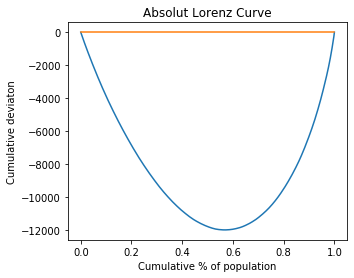

In [15]:
# Absolute Lorenz Curve
ad2.plot.lorenz(alpha='a');

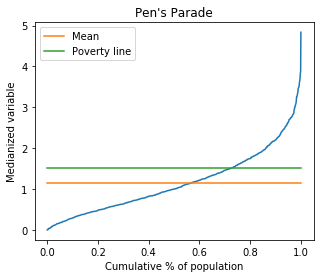

In [16]:
# Pen's Parade
ad2.plot('pen',pline=60);

### Exercise: Redistributive Effect of Fiscal Policy

Income pre and post fiscal policy:

In [17]:
# Income pre fiscal policy:
y_pre = np.array([20, 30, 40, 60, 100])

# Fiscal policy
tax = 0.2*np.maximum(y_pre-35,0)  # tax formula
revenue = np.sum(tax)             # total revenue
transfers = revenue/len(y_pre)    # per capita transfers

# Income post fiscal policy:
y_post = y_pre - tax + transfers

In [18]:
# ApodeData
df_pre = pd.DataFrame({'y1':y_pre})
ad_pre = ApodeData(df_pre,income_column='y1')

df_post = pd.DataFrame({'y2':y_post})
ad_post = ApodeData(df_post,income_column='y2')
ad_post

,y2
0,23.8
1,33.8
2,42.8
3,58.8
4,90.8


In [19]:
# Gini 
ad_pre.inequality.gini(), ad_post.inequality.gini()  # decrease inequality

(0.30399999999999994, 0.25440000000000007)

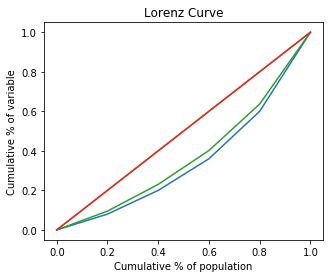

In [20]:
# Lorenz Curves
ax = ad_pre.plot.lorenz()
ad_post.plot.lorenz(ax=ax);

## Welfare

Five social welfare functions are implemented.

In [21]:
# Evaluate a welfare method
w = ad2.welfare('sen')
w

28.824397753868958

In [22]:
# Evaluate a list of welfare methods
wlf_list = [["utilitarian", None],
         ["rawlsian", None],
         ["sen",None],
         ["theill",None],
         ["theilt",None],
         ["isoelastic",0],
         ["isoelastic",1],
         ["isoelastic",2],
         ["isoelastic",np.Inf]]
p = []
for elem in wlf_list:
    if elem[1]==None:
        p.append(ad2.welfare(elem[0]))
    else:
        p.append(ad2.welfare(elem[0],alpha=elem[1]))

df_w = pd.concat([pd.DataFrame(wlf_list),pd.DataFrame(p)],axis=1)
df_w.columns = ['method','alpha','measure']
df_w   

,method,alpha,measure
0,utilitarian,NaN,45.408376
1,rawlsian,NaN,0.112876
2,sen,NaN,28.824398
3,theill,NaN,34.253866
4,theilt,NaN,36.529160
5,isoelastic,0.0,45.408376
6,isoelastic,1.0,3.533799
7,isoelastic,2.0,-0.059726
8,isoelastic,inf,0.112876


## Polarization 

Two polarization measures are implemented.

In [23]:
# Evaluate a polarization method
p = ad2.polarization('ray')
p

0.03316795744715791

In [24]:
# Evaluate a list of polarization methods
pol_list = [["ray", None],
         ["wolfson", None]]
p = []
for elem in pol_list:
    if elem[1]==None:
        p.append(ad2.polarization(elem[0]))
    else:
        p.append(ad2.polarization(elem[0],alpha=elem[1]))
df_pz = pd.concat([pd.DataFrame(pol_list),pd.DataFrame(p)],axis=1)
df_pz.columns = ['method','alpha','measure']
df_pz 

,method,alpha,measure
0,ray,None,0.033168
1,wolfson,None,0.357081


## Concentration

Four concentration measures commonly used to analyze industrial concentration are implemented.

In [25]:
# Evaluate a concentration method
c = ad2.concentration('herfindahl')
c

0.00044254144331556705

In [27]:
# Evaluate a list of concentration methods
conc_list = [["herfindahl", None],
         ["herfindahl", True],
         ["rosenbluth",None],
         ["concentration_ratio",1],
         ["concentration_ratio",5]]
p = []
for elem in conc_list:
    if elem[1]==None:
        p.append(ad2.concentration(elem[0]))
    else:
        if elem[0]=="herfindahl":
            p.append(ad2.concentration(elem[0],normalized=elem[1]))  # check keyword
        elif elem[0]=="concentration_ratio":
            p.append(ad2.concentration(elem[0],k=elem[1]))  # check keyword            
        else:
            p.append(ad2.concentration(elem[0],alpha=elem[1]))

df_c = pd.concat([pd.DataFrame(conc_list),pd.DataFrame(p)],axis=1)
df_c.columns = ['method','alpha','measure']
df_c 

,method,alpha,measure
0,herfindahl,None,0.000443
1,herfindahl,True,0.000443
2,rosenbluth,None,0.001575
3,concentration_ratio,1,0.004197
4,concentration_ratio,5,0.017352


## Tools

### Decomposition

The measures can be applied in subgroups according to a certain category. For instance:

In [28]:
x = [23, 10, 12, 21, 4, 8, 19, 15, 5, 7]
y = [10,10,20,10,10,20,20,20,10,10] 
w = np.arange(1,11)
dfa = pd.DataFrame({'x':x,'y':y,'w':w})
dfa

,x,y,w
0,23,10,1
1,10,10,2
2,12,20,3
3,21,10,4
4,4,10,5
5,8,20,6
6,19,20,7
7,15,20,8
8,5,10,9
9,7,10,10


In [29]:
# simple calculation
pline = 11
ada1 = ApodeData(dfa,income_column='x') 
p1 = ada1.poverty('headcount',pline=pline)
p1

0.5

In [30]:
# receives a dataframe and applies a measure according to the column "varg"

def poverty_gby(dfa,method,varg,pline):
    grouped = dfa.groupby(varg)
    a = []
    b = []
    c = []
    income_column = 'x'
    for name, group in grouped:
        y = group[income_column].values
        count = group.shape[0]
        adi = ApodeData({income_column:y},income_column=income_column)
        p = adi.poverty(method,pline=pline)
        a.append(name)
        b.append(p)
        c.append(count)
    xname = income_column + "_measure"
    wname =income_column + "_weight"
    return pd.DataFrame({xname: b, wname: c}, index=pd.Index(a))    

In [31]:
# group calculation according to variable "y"
p2 = poverty_gby(dfa,'headcount',varg='y', pline=pline)
p2

,x_measure,x_weight
10,0.666667,6
20,0.250000,4


In [32]:
# If the indicator is decomposable, the same result is attained:
p2_p = sum(p2['x_measure']*p2['x_weight']/sum(p2['x_weight']))
p2_p

0.5

## References

* Cowell, F. (2011) Measuring Inequality. London School of Economics Perspectives in Economic Analysis. 3rd ed. Edición. Oxford University Press
http://darp.lse.ac.uk/papersDB/Cowell_measuringinequality3.pdf
* Cowell, F. (2016) “Inequality and Poverty Measures”, in Oxford Handbook of Well-Being And Public Policy, edited by Matthew D. Adler and Marc Fleurbaey 
* Haughton, J. and S. Khandker (2009). Handbook on Poverty + Inequality. World Bank Training Series. https://openknowledge.worldbank.org/bitstream/handle/10986/11985/9780821376133.pdf
* POBREZA Y DESIGUALDAD EN AMÉRICA LATINA. https://www.cedlas.econo.unlp.edu.ar/wp/wp-content/uploads/Pobreza_desigualdad_-America_Latina.pdf
* Araar Abdelkrim and Jean-Yves Duclos (2007). "DASP: Distributive Analysis  Stata Package", PEP, World Bank, UNDP and Université Laval. http://dasp.ecn.ulaval.ca/